In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from astropy.io import fits 
%matplotlib widget

In [26]:
science_list = np.genfromtxt('../group08_HAT-P-12_20230214/science/science_list', dtype=str)
science_test_list=science_list[:10]
science_frame_name='../group08_HAT-P-12_20230214/correct/'+science_test_list[-1][:-5]+'.p'
science_corrected=pickle.load(open(science_frame_name,'rb'))

vmin: 943.26 vmax: 27693.40


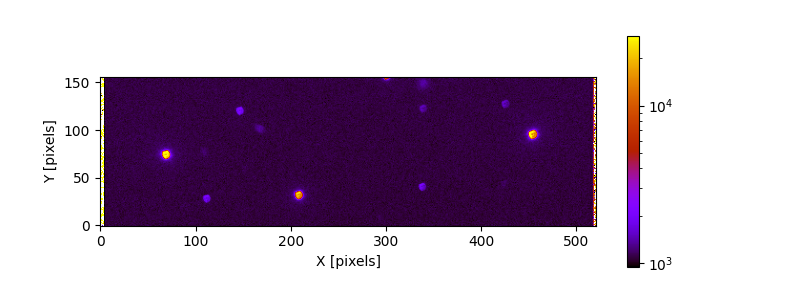

In [27]:
import matplotlib.colors as colors

vmin = np.amin(science_corrected[:, 100:400])
vmax = np.amax(science_corrected[:, 100:400])
print('vmin: {0:5.2f} vmax: {1:5.2f}'.format(vmin, vmax))

fig, ax = plt.subplots(1, figsize = (8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')
plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

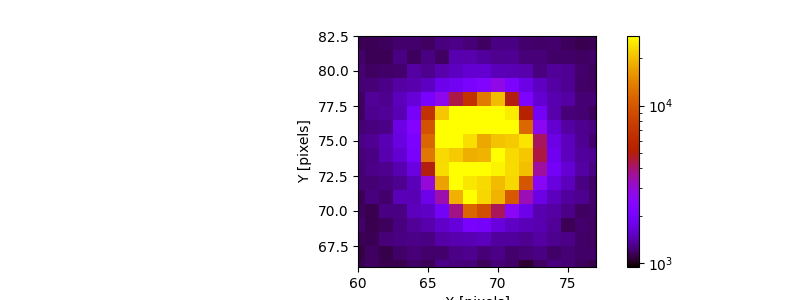

In [28]:
#we seem to be centered around x=69 y=75
fig, ax = plt.subplots(1, figsize = (8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')
plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.xlim(60, 77)
plt.ylim(66, 82.5)
plt.show()

In [29]:
xtarget=69
ytarget=74
x_ref=208
y_ref=31


In [30]:
def make_circle_around_star(x_pos,y_pos,color='w',label=''):
    from matplotlib.patches import Circle
    radii=[9,15]
    n=50 #our linspace length
    theta=np.linspace(0,2*np.pi,n)
    xs=np.outer(radii,np.cos(theta))#makes x coord of inner circle, then outer circle 
    ys=np.outer(radii,np.sin(theta))#makes y coord of inner circle, then outer circle
    xs[1,:]=xs[1,::-1]
    ys[1,:]=ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos,np.ravel(ys)+y_pos,
            edgecolor=None,facecolor=color,
           alpha=0.75,
           label=label) #filling up the circle, alpha is transparency
    

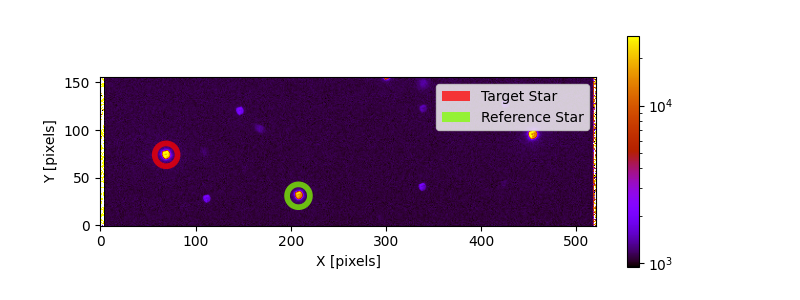

In [31]:
fig, ax = plt.subplots(1, figsize = (8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')

make_circle_around_star(xtarget,ytarget,color='r',label='Target Star')
make_circle_around_star(x_ref,y_ref,color='chartreuse',label='Reference Star')
plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.legend()
plt.show()

In [32]:
#distribution of flux around our star
ylen,xlen=np.shape(science_corrected)
x_axis=np.arange(0,xlen,1)
y_axis=np.arange(0,ylen,1)
X,Y=np.meshgrid(x_axis,y_axis)


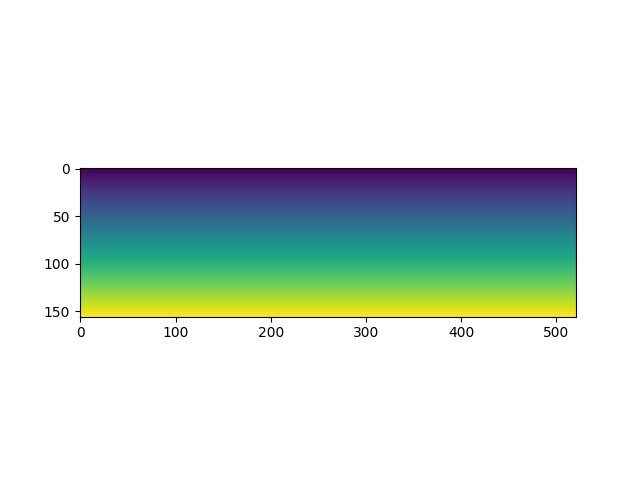

In [33]:
plt.figure()
plt.imshow(X)
plt.imshow(Y)

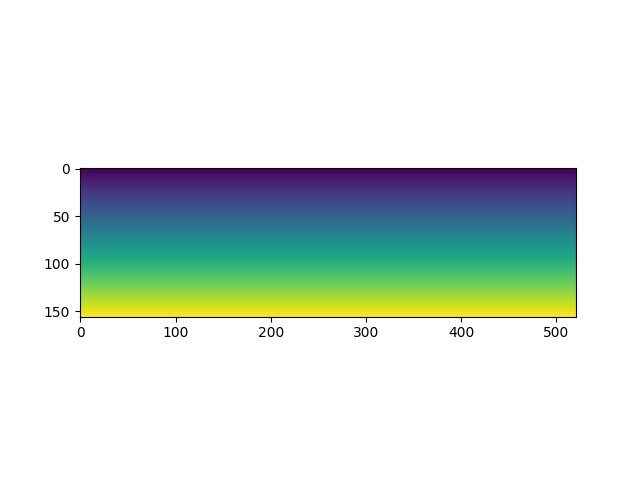

In [34]:
plt.figure()
plt.imshow(Y)

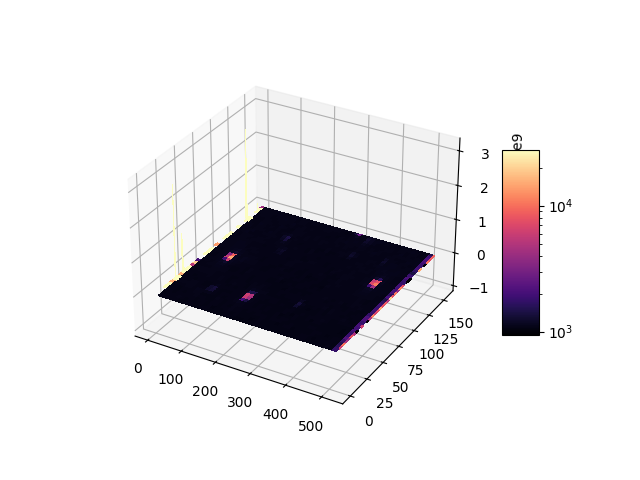

In [35]:
#making a 3d plot
fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
surf=ax.plot_surface(X,Y,science_corrected,
                    cmap=plt.colormaps['magma'],#choose a colormap color that can be seen by colorblind people
                    norm=colors.LogNorm(vmin=vmin,vmax=vmax),
                    linewidth=0,
                    antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5)
#we should make a plot only of our target/what we are interested in
plt.show()

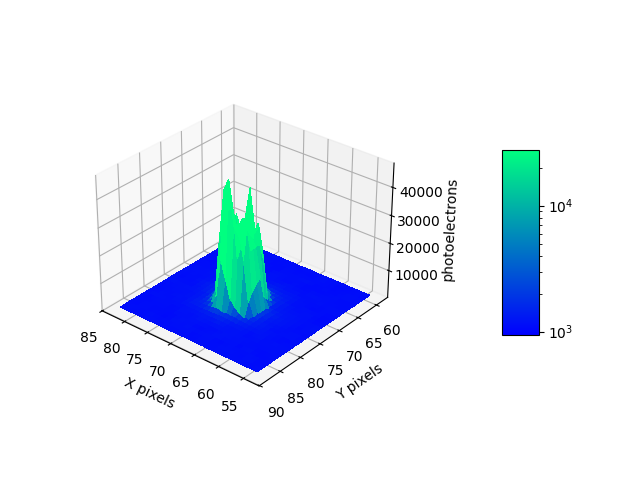

In [36]:
#selecting our target star
radius_plot=15
fig,ax=plt.subplots(subplot_kw={"projection":"3d"})


surf=ax.plot_surface(X[ytarget-radius_plot:ytarget+radius_plot,xtarget-radius_plot:xtarget+radius_plot],
                    Y[ytarget-radius_plot:ytarget+radius_plot,xtarget-radius_plot:xtarget+radius_plot],
                    science_corrected[ytarget-radius_plot:ytarget+radius_plot,xtarget-radius_plot:xtarget+radius_plot],
                     cmap=plt.colormaps['winter'],#choose a colormap color that can be seen by colorbind people
                    norm=colors.LogNorm(vmin=vmin,vmax=vmax),
                    linewidth=0,
                    antialiased=False)
fig.colorbar(surf,shrink=0.5,aspect=5,pad=0.2)#can also label ticks

ax.azim=130
ax.elevation=25
ax.set_ylabel('Y pixels')
ax.set_xlabel('X pixels')
ax.set_zlabel('photoelectrons',rotation=90)
plt.show()

### 18/11

We will use a weighted average to plot the target again.

In [37]:
#This is showing why we use meshgrid
import time

t0=time.time()
print('Seconds passed since January 1,1970,00:00:00 (UTC): {0:18.4f}'.format(t0))
#seconds passed between to times
t1=time.time()
delta_time=t1-t0
print('time spend to print the previous message: {0:.8f}'.format(delta_time))

Seconds passed since January 1,1970,00:00:00 (UTC):    1732379319.1374
time spend to print the previous message: 0.00012422


In [38]:
#sandwhich your function between to instances of time.time to see how long your program takes.
t0=time.time()
rr_method01=np.zeros_like(science_corrected)
for xi in range(0,np.shape(science_corrected)[0]):
    for y1 in range(0,np.shape(science_corrected)[1]):
        rr_method01=np.sqrt((xi-xtarget)**2+(y1-ytarget)**2)
t1=time.time()
print('Time required by the first method: {0:f} seconds'.format(t1-t0))

Time required by the first method: 0.114341 seconds


In [39]:
t0=time.time()
ylen,xlen=np.shape(science_corrected)#pay attention here, # of rows is the y value, number of columnsis the x values.

X_axis=np.arange(0,xlen)
Y_axis=np.arange(0,ylen)
X,Y=np.meshgrid(X_axis,Y_axis)
t1=time.time()
print('Time required to set up the second method: {0:f} seconds'.format(t1-t0))

rr_method2=np.sqrt((X-xtarget)**2+(Y-ytarget)**2)
t2=time.time()
print('Time required to complete the second method: {0:f} seconds'.format(t2-t1))
print('Time to fully complete the second method: {0:f} seconds'.format(t2-t0))

Time required to set up the second method: 0.000820 seconds
Time required to complete the second method: 0.000655 seconds
Time to fully complete the second method: 0.001474 seconds


Back to plotting.

In [40]:
def make_circle_around_star(x_pos,y_pos,radius, color='w',label='',thickness=0.5, alpha=1.): #we add radius, thickness and alpha term to our old function
    #from matplotlib.patches import Circle
    radii=[radius,radius+thickness]
    n=50 #our linspace length
    theta=np.linspace(0,2*np.pi,n)
    xs=np.outer(radii,np.cos(theta))#makes x coord of inner circle, then outer circle 
    ys=np.outer(radii,np.sin(theta))#makes y coord of inner circle, then outer circle
    xs[1,:]=xs[1,::-1]
    ys[1,:]=ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos,np.ravel(ys)+y_pos,
            edgecolor=None,facecolor=color,
           alpha=0.75,
           label=label) #filling up the circle, alpha is transparency

/tmp/ipykernel_1130/164357637.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize = (8,3))


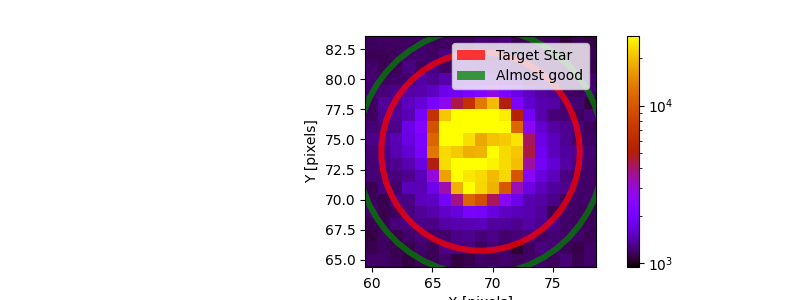

In [41]:
inner_radius = 8

fig, ax = plt.subplots(1, figsize = (8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')

make_circle_around_star(xtarget,ytarget,radius=inner_radius,color='r',label='Target Star')

make_circle_around_star(xtarget,ytarget,10,color='g',label='Almost good')

#make_circle_around_star(x_ref,y_ref,color='chartreuse',label='Reference Star')
plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.legend(loc='upper right')
plt.xlim(xtarget-inner_radius*1.2,xtarget+inner_radius*1.2)
plt.ylim(ytarget-inner_radius*1.2,ytarget+inner_radius*1.2)
plt.show()

The goal is to have a centered star, encapsulating only the star but all of the star. We don't want to have parts of the star in the sky background. We want the circle to fully encapsulate the star.

We will use a more quantitative method for the aperture calculation, but this initial region for marking the photocenter can be done by eye.

Let's now compute the photocenter.

In [42]:
x_target=69
y_target=74
inner_radius = 8
X_axis=np.arange(0,xlen)
Y_axis=np.arange(0,ylen)
X,Y=np.meshgrid(X_axis,Y_axis)

target_distance=np.sqrt((X-x_target)**2+(Y-y_target)**2)
circle_selection=(target_distance<inner_radius) #selects everything within our chosen circle

weighted_X=np.sum(X[circle_selection]*science_corrected[circle_selection]) #same dim as xlen
weighted_Y=np.sum(Y[circle_selection]*science_corrected[circle_selection]) #same dim as ylen
total_flux=np.sum(science_corrected[circle_selection])

x_target_refined=weighted_X/total_flux
y_target_refined=weighted_Y/total_flux

print('Initial coordinates x:{0:5.2f} y{1:5.2f}'.format(x_target,y_target))
print('Refined coordinates x:{0:5.2f} y{1:5.2f}'.format(x_target_refined,y_target_refined))

Initial coordinates x:69.00 y74.00
Refined coordinates x:68.76 y74.36


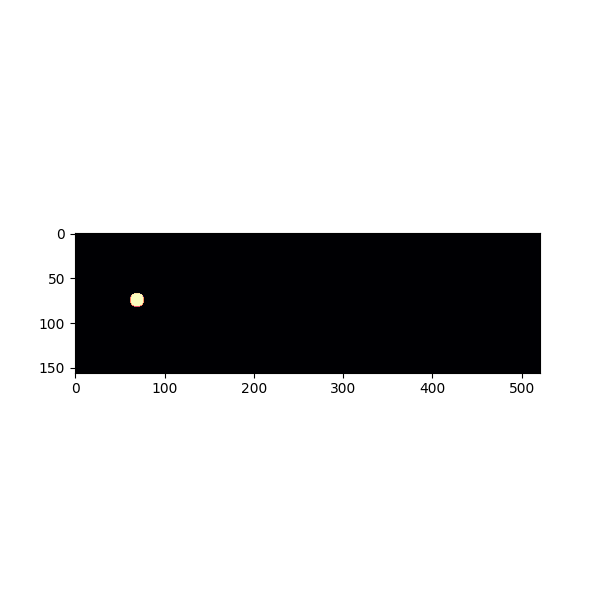

In [43]:
fig,ax=plt.subplots(1,figsize=(6,6))
im1=plt.imshow(circle_selection,cmap=plt.colormaps['magma'])

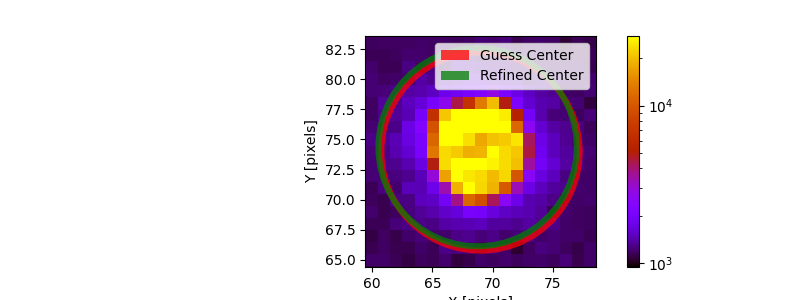

In [44]:
inner_radius = 8

fig, ax = plt.subplots(1, figsize = (8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')

make_circle_around_star(xtarget,ytarget,radius=inner_radius,color='r',label='Guess Center')

make_circle_around_star(x_target_refined,y_target_refined,inner_radius,color='g',label='Refined Center')

#make_circle_around_star(x_ref,y_ref,color='chartreuse',label='Reference Star')
plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.legend(loc='upper right')
plt.xlim(xtarget-inner_radius*1.2,xtarget+inner_radius*1.2)
plt.ylim(ytarget-inner_radius*1.2,ytarget+inner_radius*1.2)
plt.show()

In [45]:
#Making some small adjustments
x_target_initial=69
y_target_initial=74
#you can print these is you feel like it

inner_radius = 8
X_axis=np.arange(0,xlen)
Y_axis=np.arange(0,ylen)
X,Y=np.meshgrid(X_axis,Y_axis)

#we want to iterate over the refining proccess until we reach some threshold or the maximum # of iterations
maximum_iterations=30 #invented, no real reason for 30

for i_iter in range(0,maximum_iterations):
    if i_iter==0:
        x_target=x_target_initial
        y_target=y_target_initial
    else:
        x_target=x_target_refined
        y_target=y_target_refined
    target_distance=np.sqrt((X-x_target)**2+(Y-y_target)**2)
    circle_selection=(target_distance<inner_radius) #selects everything within our chosen circle

    weighted_X=np.sum(X[circle_selection]*science_corrected[circle_selection]) #same dim as xlen
    weighted_Y=np.sum(Y[circle_selection]*science_corrected[circle_selection]) #same dim as ylen
    total_flux=np.sum(science_corrected[circle_selection])

    x_target_refined=weighted_X/total_flux
    y_target_refined=weighted_Y/total_flux
    
    percent_variation_x=(x_target_refined-x_target)/x_target*100
    percent_variation_y=(y_target_refined-y_target)/y_target*100
    print('Iteration{0:3d}  x:{1:.3f} ({2:.2f}%) y:{3:.3f} ({4:.2f}%)'.format(i_iter,x_target_refined,percent_variation_x,y_target_refined,percent_variation_y))
    if np.abs(percent_variation_x)<0.1 and np.abs(percent_variation_y)<0.1:
        break
    
print('Initial coordinates x:{0:5.2f} y:{1:5.2f}'.format(x_target,y_target))
print('Refined coordinates x:{0:5.2f} y:{1:5.2f}'.format(x_target_refined,y_target_refined))


Iteration  0  x:68.758 (-0.35%) y:74.364 (0.49%)
Iteration  1  x:68.716 (-0.06%) y:74.425 (0.08%)
Initial coordinates x:68.76 y:74.36
Refined coordinates x:68.72 y:74.42
